In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split 
from sklearn.tree import *  #import everything from tree submodule(which is in sklearn library)  
from sklearn.metrics import *

No, importing just sklearn alone doesn't automatically import everything in the scikit-learn library. Here's why:

- Size and efficiency: Scikit-learn is a large library with many modules and functions. Importing everything at once would be inefficient and could slow down your program.
- Namespace pollution: Importing everything could clutter your namespace with many functions and classes you might not use.
- Scikit-learn's structure: The library is organized into submodules for different functionalities (e.g., model_selection, preprocessing, metrics).

In [2]:
df = pd.read_csv("C:/Users/Navin Kumar/Desktop/coding_jupyter_notebook/DATA/heart.csv")

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


#### `Understanding Data`



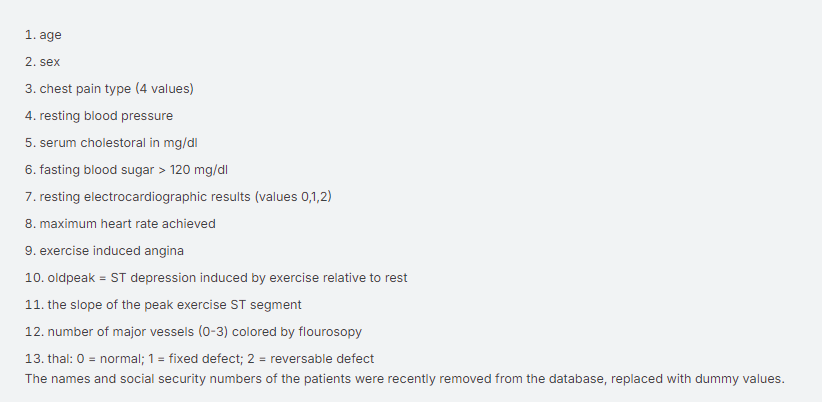

- CP - Chest pain level - (chest pain is low medium or high)
- trestbps - resting blood pressure 
- chol - cholstrol
- fbs - fasting blood sugar level
- restecg	 - resting electrocardiac result
- thalach	 - maximum hearth rate if person is doing exercise
- exang - kind of exercise person is doing  
- oldpeak - what is the old peak of heartrate
- slope - 
- ca - 
- thal -
- target -

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.duplicated().sum()

1

In [7]:
df = df.drop_duplicates()

In [8]:
df.duplicated().sum()

0

In [9]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


25%	48.00000 means 25 % population has age < 48 

[]

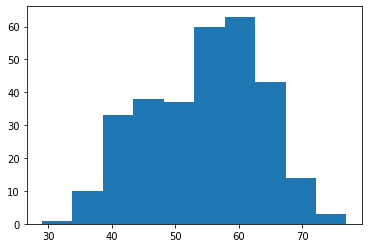

In [10]:
# df['age'].hist(bins= 10)
plt.hist(df['age'],bins=10)
plt.plot()

Suppose you have the following statistics for a column:

1) Mean: 70
2) Median (50%): 65
3) 25% (Q1): 50
4) 75% (Q3): 80
5) Standard Deviation: 20

`Interpretation:`

- The mean is greater than the median, suggesting a right-skewed distribution.- 
- The distance from the median to the 75th percentile (80 - 65 = 15) is greater than the distance from the median to the 25th percentile (65 - 50 = 15), further indicating a possible right skew.
- The standard deviation indicates moderate variability in the data, which might contribute to this skew.

C:\Users\Navin Kumar\AppData\Local\Temp\ipykernel_21240\2154471068.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==1]['age'],label="Male")
C:\Users\Navin Kumar\AppData\Local\Temp\ipykernel_21240\2154471068.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['sex']==0]['ag

[]

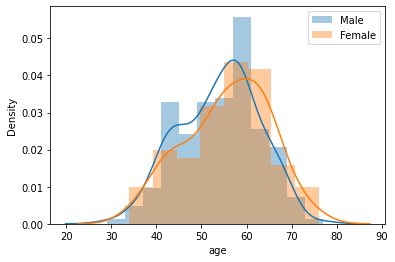

In [11]:
sns.distplot(df[df['sex']==1]['age'],label="Male")
sns.distplot(df[df['sex']==0]['age'],label="Female")
plt.legend()
plt.plot()

In [12]:
df['age'].skew()

-0.2037432795959691

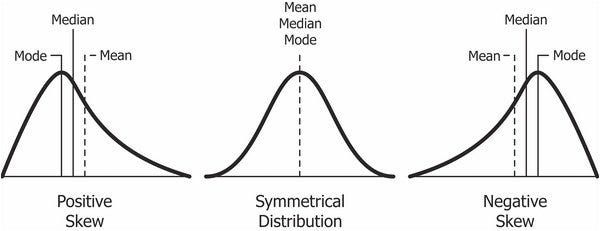

In negative skewness, the graph shifts to the right. This means that the left tail of the distribution is longer or fatter than the right tail, with most of the data concentrated on the right side of the distribution.

<Axes: xlabel='chol'>

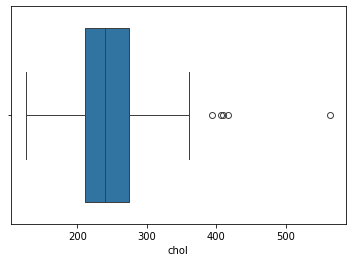

In [13]:
sns.boxplot(data=df,x='chol')

`Important: ` here we do not remove the outliers because it is a very sensitive dataset.
- medical and stocks data is very sensitive so we have to think much before dropping it .

In [14]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

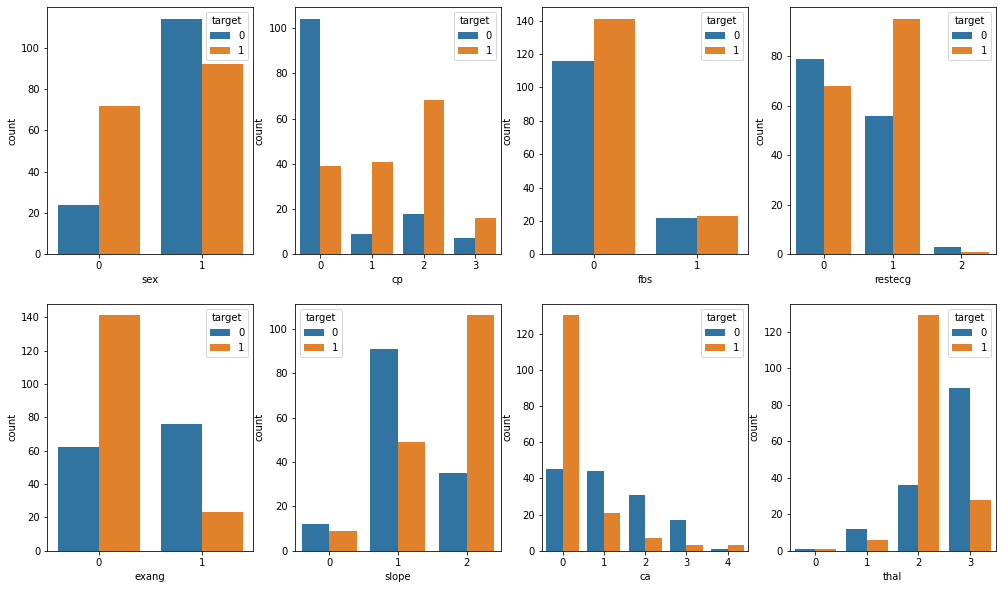

In [15]:
fig,axes = plt.subplots(nrows=2, ncols=4,figsize=(17,10))
cat_feat = ['sex','cp','fbs','restecg','exang','slope','ca','thal','target']

for index,features in enumerate(cat_feat):
    if features != 'target' :
        ax=axes[int(index/4),index%4]   #(rows and columns index)
        sns.countplot(x=features , hue = 'target', data= df , ax=ax)

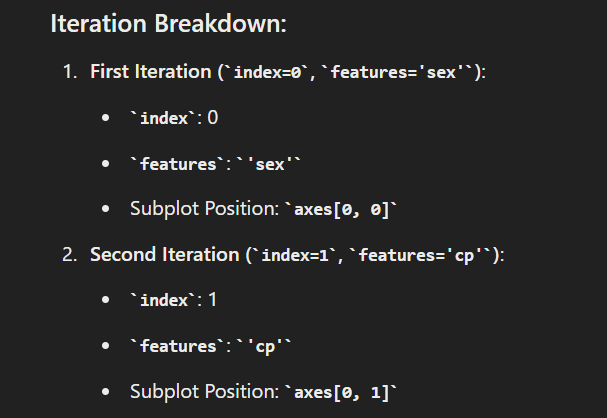

In [16]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.094962,-0.063107,0.283121,0.207216,0.119492,-0.111590,-0.395235,0.093216,0.206040,-0.164124,0.302261,0.065317,-0.221476
sex,-0.094962,1.000000,-0.051740,-0.057647,-0.195571,0.046022,-0.060351,-0.046439,0.143460,0.098322,-0.032990,0.113060,0.211452,-0.283609
cp,-0.063107,-0.051740,1.000000,0.046486,-0.072682,0.096018,0.041561,0.293367,-0.392937,-0.146692,0.116854,-0.195356,-0.160370,0.432080
trestbps,0.283121,-0.057647,0.046486,1.000000,0.125256,0.178125,-0.115367,-0.048023,0.068526,0.194600,-0.122873,0.099248,0.062870,-0.146269
chol,0.207216,-0.195571,-0.072682,0.125256,1.000000,0.011428,-0.147602,-0.005308,0.064099,0.050086,0.000417,0.086878,0.096810,-0.081437
fbs,0.119492,0.046022,0.096018,0.178125,0.011428,1.000000,-0.083081,-0.007169,0.024729,0.004514,-0.058654,0.144935,-0.032752,-0.026826
restecg,-0.111590,-0.060351,0.041561,-0.115367,-0.147602,-0.083081,1.000000,0.041210,-0.068807,-0.056251,0.090402,-0.083112,-0.010473,0.134874
thalach,-0.395235,-0.046439,0.293367,-0.048023,-0.005308,-0.007169,0.041210,1.000000,-0.377411,-0.342201,0.384754,-0.228311,-0.094910,0.419955
exang,0.093216,0.143460,-0.392937,0.068526,0.064099,0.024729,-0.068807,-0.377411,1.000000,0.286766,-0.256106,0.125377,0.205826,-0.435601
oldpeak,0.206040,0.098322,-0.146692,0.194600,0.050086,0.004514,-0.056251,-0.342201,0.286766,1.000000,-0.576314,0.236560,0.209090,-0.429146


[]

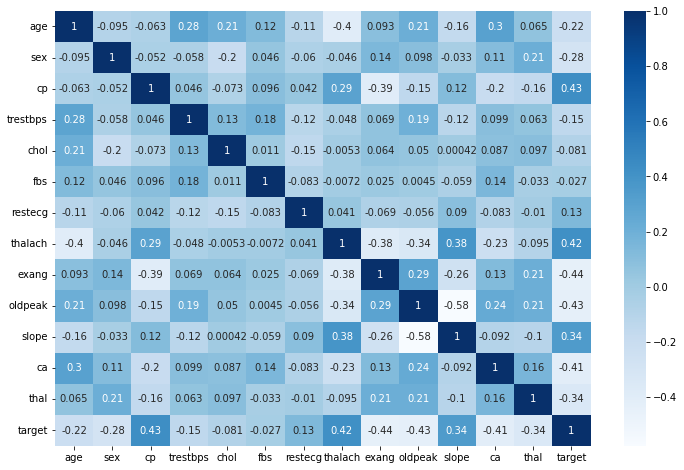

In [17]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.plot()

In [ ]:
pip install autoviz